In [1]:
# importing libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
import time
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn import metrics
import yellowbrick.classifier 
from yellowbrick.classifier import ROCAUC
from sklearn.calibration import CalibratedClassifierCV

In [2]:
# Reading the dataset

df=pd.read_csv(r"C:\Fall 2022 courses\Project\Model-Calibration\data\Netflix Userbase.csv")
df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


In [3]:
#  Checking the size of data

a=len(df.columns)
b=len(df)

print(f"The number of columns in dataset are: {a}")
print(f"The number of rows in data are: {b}")

The number of columns in dataset are: 10
The number of rows in data are: 2500


In [4]:
# reading data description

a=df.describe()
b=df.isnull().sum()

print(f"The numerical data distriution is:-")
print(f"{a}")
print("\n")
print(f"The number of null value in data are:-")
print(f"{b}")

The numerical data distriution is:-
          User ID  Monthly Revenue          Age
count  2500.00000      2500.000000  2500.000000
mean   1250.50000        12.508400    38.795600
std     721.83216         1.686851     7.171778
min       1.00000        10.000000    26.000000
25%     625.75000        11.000000    32.000000
50%    1250.50000        12.000000    39.000000
75%    1875.25000        14.000000    45.000000
max    2500.00000        15.000000    51.000000


The number of null value in data are:-
User ID              0
Subscription Type    0
Monthly Revenue      0
Join Date            0
Last Payment Date    0
Country              0
Age                  0
Gender               0
Device               0
Plan Duration        0
dtype: int64


In [5]:
# Cleaning  the dataset

df=df.drop(columns=['User ID'])

In [6]:
# Checking data information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Subscription Type  2500 non-null   object
 1   Monthly Revenue    2500 non-null   int64 
 2   Join Date          2500 non-null   object
 3   Last Payment Date  2500 non-null   object
 4   Country            2500 non-null   object
 5   Age                2500 non-null   int64 
 6   Gender             2500 non-null   object
 7   Device             2500 non-null   object
 8   Plan Duration      2500 non-null   object
dtypes: int64(2), object(7)
memory usage: 175.9+ KB


In [7]:
df.nunique()

Subscription Type      3
Monthly Revenue        6
Join Date            300
Last Payment Date     26
Country               10
Age                   26
Gender                 2
Device                 4
Plan Duration          1
dtype: int64

## EDA

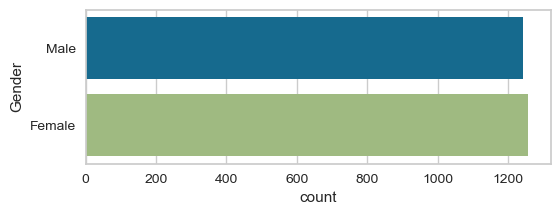

In [8]:
# Distribution gender

plt.rcParams["figure.figsize"] = (6,2)
sns.countplot(y="Gender",  data=(df))
plt.show()

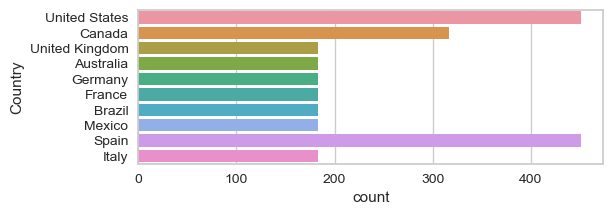

In [9]:
# Distribution of Country

plt.rcParams["figure.figsize"] = (6,2)
sns.countplot(y="Country",  data=(df))
plt.show()

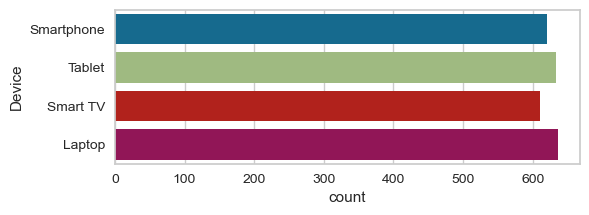

In [10]:
# Distribution of Device

plt.rcParams["figure.figsize"] = (6,2)
sns.countplot(y="Device",  data=(df))
plt.show()

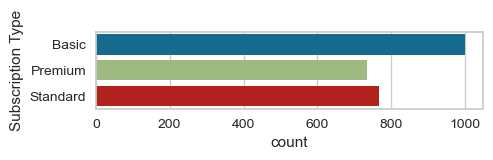

In [11]:
# Distribution of Subscription type

plt.rcParams["figure.figsize"] = (5,1)
sns.countplot(y="Subscription Type",  data=(df))
plt.show()

In [12]:
# checking number of days a customer is subscribed

df[['Join Date','Last Payment Date']] = df[['Join Date','Last Payment Date']].apply(pd.to_datetime) #if conversion required
df['Number of Days subscribed'] = (df['Last Payment Date'] - df['Join Date']).dt.days
df.head()

,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration,Number of Days subscribed
0,Basic,10,2022-01-15,2023-10-06,United States,28,Male,Smartphone,1 Month,629
1,Premium,15,2021-05-09,2023-06-22,Canada,35,Female,Tablet,1 Month,774
2,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,1 Month,119
3,Standard,12,2022-10-07,2023-06-26,Australia,51,Female,Laptop,1 Month,262
4,Basic,10,2023-01-05,2023-06-28,Germany,33,Male,Smartphone,1 Month,174


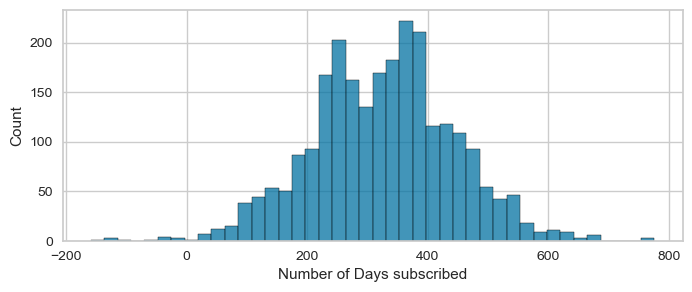

In [13]:
plt.rcParams["figure.figsize"] = (8,3)
sns.histplot(data=df, x=df['Number of Days subscribed'])
plt.show()

In [14]:
# Drop plan duration 

df=df.drop(columns=['Plan Duration'])
df.head()

,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Number of Days subscribed
0,Basic,10,2022-01-15,2023-10-06,United States,28,Male,Smartphone,629
1,Premium,15,2021-05-09,2023-06-22,Canada,35,Female,Tablet,774
2,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,119
3,Standard,12,2022-10-07,2023-06-26,Australia,51,Female,Laptop,262
4,Basic,10,2023-01-05,2023-06-28,Germany,33,Male,Smartphone,174


In [15]:
# Separting the month and year they joined

df['Joined Month']=df['Join Date'].dt.month
df['Joined year']=df['Join Date'].dt.year
df.head()

,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Number of Days subscribed,Joined Month,Joined year
0,Basic,10,2022-01-15,2023-10-06,United States,28,Male,Smartphone,629,1,2022
1,Premium,15,2021-05-09,2023-06-22,Canada,35,Female,Tablet,774,5,2021
2,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,119,2,2023
3,Standard,12,2022-10-07,2023-06-26,Australia,51,Female,Laptop,262,10,2022
4,Basic,10,2023-01-05,2023-06-28,Germany,33,Male,Smartphone,174,1,2023


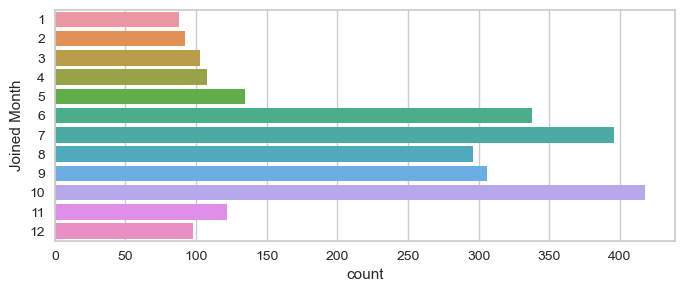

In [16]:
# Checking the distribution for joining month

plt.rcParams["figure.figsize"] = (8,3)
sns.countplot(data=df, y=df['Joined Month'])
plt.show()

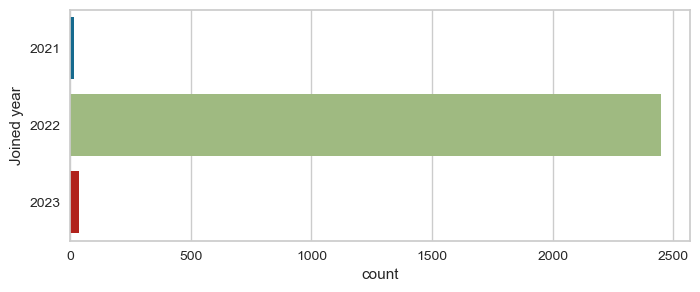

In [17]:
# Checking the distribution for joining month year

plt.rcParams["figure.figsize"] = (8,3)
sns.countplot(data=df, y=df['Joined year'])
plt.show()

In [18]:
# Separting the month and year they last payment

df['Last payment month']=df['Last Payment Date'].dt.month
df['Last payment year ']=df['Last Payment Date'].dt.year
df.head()

,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Number of Days subscribed,Joined Month,Joined year,Last payment month,Last payment year
0,Basic,10,2022-01-15,2023-10-06,United States,28,Male,Smartphone,629,1,2022,10,2023
1,Premium,15,2021-05-09,2023-06-22,Canada,35,Female,Tablet,774,5,2021,6,2023
2,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,119,2,2023,6,2023
3,Standard,12,2022-10-07,2023-06-26,Australia,51,Female,Laptop,262,10,2022,6,2023
4,Basic,10,2023-01-05,2023-06-28,Germany,33,Male,Smartphone,174,1,2023,6,2023


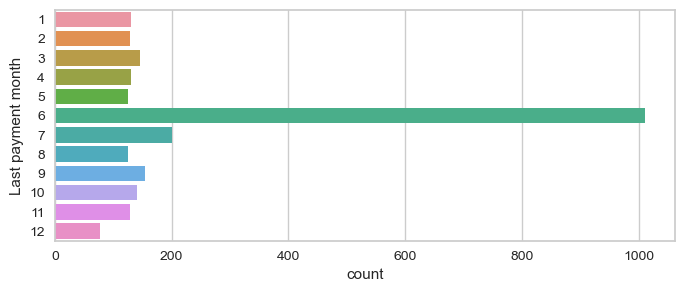

In [19]:
# Checking the distribution for joining month

plt.rcParams["figure.figsize"] = (8,3)
sns.countplot(data=df, y=df['Last payment month'])
plt.show()

In [20]:
# Checking how many of subsciptions are active (as this is historical dataset we can check the latest payment date and then check how many days before has the payment been made)
        
df['Type of subscriber']=df['Last payment month'].apply(lambda x: "Not Active" if x < 7 else "Dormant"  if x > 7 and  x < 11 else "Active")

In [21]:
df

,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Number of Days subscribed,Joined Month,Joined year,Last payment month,Last payment year,Type of subscriber
0,Basic,10,2022-01-15,2023-10-06,United States,28,Male,Smartphone,629,1,2022,10,2023,Dormant
1,Premium,15,2021-05-09,2023-06-22,Canada,35,Female,Tablet,774,5,2021,6,2023,Not Active
2,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,119,2,2023,6,2023,Not Active
3,Standard,12,2022-10-07,2023-06-26,Australia,51,Female,Laptop,262,10,2022,6,2023,Not Active
4,Basic,10,2023-01-05,2023-06-28,Germany,33,Male,Smartphone,174,1,2023,6,2023,Not Active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,Premium,14,2022-07-25,2023-12-07,Spain,28,Female,Smart TV,500,7,2022,12,2023,Active
2496,Basic,15,2022-04-08,2023-07-14,Spain,33,Female,Smart TV,462,4,2022,7,2023,Active
2497,Standard,12,2022-09-08,2023-07-15,United States,38,Male,Laptop,310,9,2022,7,2023,Active
2498,Standard,13,2022-12-08,2023-12-07,Canada,48,Female,Tablet,364,12,2022,12,2023,Active


In [22]:
# Droping some of the columns not needed

df=df.drop(columns=['Join Date', 'Last Payment Date', 'Last payment year '])
df.head()

,Subscription Type,Monthly Revenue,Country,Age,Gender,Device,Number of Days subscribed,Joined Month,Joined year,Last payment month,Type of subscriber
0,Basic,10,United States,28,Male,Smartphone,629,1,2022,10,Dormant
1,Premium,15,Canada,35,Female,Tablet,774,5,2021,6,Not Active
2,Standard,12,United Kingdom,42,Male,Smart TV,119,2,2023,6,Not Active
3,Standard,12,Australia,51,Female,Laptop,262,10,2022,6,Not Active
4,Basic,10,Germany,33,Male,Smartphone,174,1,2023,6,Not Active


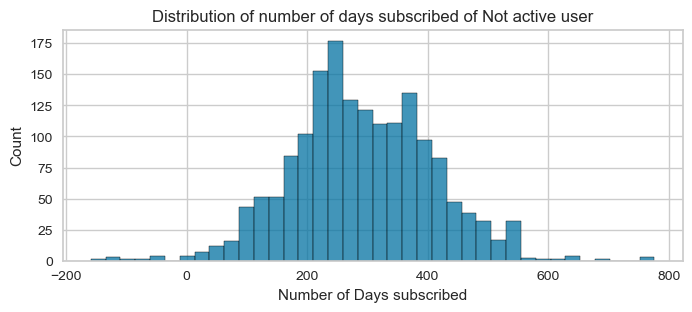

In [23]:
plt.rcParams["figure.figsize"] = (8,3)
sns.histplot(data=df, x=df[df['Type of subscriber']=="Not Active"]['Number of Days subscribed'])
plt.title("Distribution of number of days subscribed of Not active user")
plt.show()

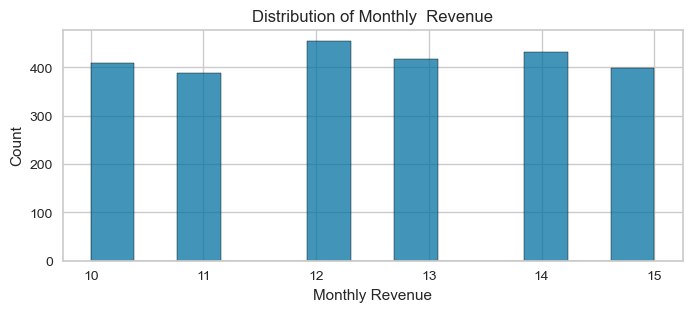

In [24]:
## plotting monthly revenue

plt.rcParams["figure.figsize"] = (8,3)
sns.histplot(data=df, x=df['Monthly Revenue'])
plt.title("Distribution of Monthly  Revenue")
plt.show()

In [25]:
## Loss due to Non Active user

print(f"Total Revenue is:- ${df['Monthly Revenue'].sum()}")
print(f"Loss due to Non Active user is:- ${df[df['Type of subscriber']=='Not Active']['Monthly Revenue'].sum()}")

Total Revenue is:- $31271
Loss due to Non Active user is:- $20946


## Feature engineering

In [26]:
# one hot encoding

df_one_hot=pd.get_dummies(df, columns = ['Subscription Type', 'Gender', 'Country', 'Device'])
df_one_hot

,Monthly Revenue,Age,Number of Days subscribed,Joined Month,Joined year,Last payment month,Type of subscriber,Subscription Type_Basic,Subscription Type_Premium,Subscription Type_Standard,...,Country_Germany,Country_Italy,Country_Mexico,Country_Spain,Country_United Kingdom,Country_United States,Device_Laptop,Device_Smart TV,Device_Smartphone,Device_Tablet
0,10,28,629,1,2022,10,Dormant,1,0,0,...,0,0,0,0,0,1,0,0,1,0
1,15,35,774,5,2021,6,Not Active,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,12,42,119,2,2023,6,Not Active,0,0,1,...,0,0,0,0,1,0,0,1,0,0
3,12,51,262,10,2022,6,Not Active,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,10,33,174,1,2023,6,Not Active,1,0,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,14,28,500,7,2022,12,Active,0,1,0,...,0,0,0,1,0,0,0,1,0,0
2496,15,33,462,4,2022,7,Active,1,0,0,...,0,0,0,1,0,0,0,1,0,0
2497,12,38,310,9,2022,7,Active,0,0,1,...,0,0,0,0,0,1,1,0,0,0
2498,13,48,364,12,2022,12,Active,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [27]:
# Features

X=df_one_hot.drop(columns=['Type of subscriber'])

In [28]:
# predicted variable

y=df_one_hot['Type of subscriber']
y=y.replace(['Active','Dormant','Not Active'],[1,0,-1])
y

0       0
1      -1
2      -1
3      -1
4      -1
       ..
2495    1
2496    1
2497    1
2498    1
2499    1
Name: Type of subscriber, Length: 2500, dtype: int64

In [29]:
# Splitting the dataset in to training , calibration and test data

train_set=0.7
calibration_set=0.1
test_set=0.2

In [30]:
# splitting training & test data

X_train_calib_1, X_test_1, y_train_calib_1, y_test_1 =train_test_split(X,y,test_size=test_set,
                                               random_state=42, shuffle=True) 

In [31]:
# splitting calibration and tets data

X_train_1, X_calib_1, y_train_1, y_calib_1 = train_test_split(X_train_calib_1, y_train_calib_1, 
                                                              test_size=calibration_set/(1-test_set), 
                                                              random_state=42)

In [32]:
X_train_1.shape, X_calib_1.shape, X_test_1.shape

((1750, 25), (250, 25), (500, 25))

In [34]:
# To understand the problem better, let's see what percentage of customer convert in three classes
np.mean(abs(y_train_1))

0.8314285714285714

In [67]:
#Data was splitted as 80% train data and 20% test data.
 
y_train = y_train.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)
 
print("X_train shape:",X_train.shape)
print("X_test shape:",X_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)

X_train shape: (2000, 25)
X_test shape: (500, 25)
y_train shape: (2000, 1)
y_test shape: (500, 1)


In [68]:
#Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

## Modelling

In [69]:
#To store results of models, we create two dictionaries
result_dict_train = {}
result_dict_test = {}

### Logistic Regression

In [70]:
reg = LogisticRegression(random_state = 42)
accuracies = cross_val_score(reg, X_train, y_train, cv=5)
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
 
#Obtain accuracy
print("Train Score:",np.mean(accuracies))
print("Test Score:",reg.score(X_test,y_test))

Train Score: 0.8244999999999999
Test Score: 0.83


In [71]:
#Store results in the dictionaries
result_dict_train["Logistic Train Score"] = np.mean(accuracies)
result_dict_test["Logistic Test Score"] = reg.score(X_test,y_test)

### KNN

In [72]:
knn = KNeighborsClassifier()
accuracies = cross_val_score(knn, X_train, y_train, cv=5)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
 
#Obtain accuracy
print("Train Score:",np.mean(accuracies))
print("Test Score:",knn.score(X_test,y_test))

Train Score: 0.6835
Test Score: 0.702


In [73]:
#Store results in the dictionaries
result_dict_train["KNN Train Score"] = np.mean(accuracies)
result_dict_test["KNN Test Score"] = knn.score(X_test,y_test)

### SVC

In [74]:
svc = SVC(random_state = 42)
accuracies = cross_val_score(svc, X_train, y_train, cv=5)
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
 
#Obtain accuracy
print("Train Score:",np.mean(accuracies))
print("Test Score:",svc.score(X_test,y_test))

Train Score: 0.798
Test Score: 0.818


In [75]:
#Store results in the dictionaries
result_dict_train["SVM Train Score"] = np.mean(accuracies)
result_dict_test["SVM Test Score"] = svc.score(X_test,y_test)

### Decision Tree

In [76]:
dtc = DecisionTreeClassifier(random_state = 42)
dtc_accuracies = cross_val_score(dtc, X_train, y_train, cv=5)
dtc.fit(X_train,y_train)
y_pred = dtc.predict(X_test)
 
#Obtain accuracy
print("Train Score:",np.mean(accuracies))
print("Test Score:",dtc.score(X_test,y_test))

Train Score: 0.798
Test Score: 1.0


In [77]:
#Store results in the dictionaries
result_dict_train["Decision Tree Train Score"] = np.mean(accuracies)
result_dict_test["Decision Tree Test Score"] = dtc.score(X_test,y_test)

### Random Forest

In [78]:
rfc = RandomForestClassifier(random_state = 42)
accuracies = cross_val_score(rfc, X_train, y_train, cv=5)
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)
 
#Obtain accuracy
print("Train Score:",np.mean(accuracies))
print("Test Score:",rfc.score(X_test,y_test))

Train Score: 0.9995
Test Score: 1.0


In [79]:
#Store results in the dictionaries
result_dict_train["Random Forest Train Score"] = np.mean(accuracies)
result_dict_test["Random Forest Test Score"] = rfc.score(X_test,y_test)

### Gaussian NB

In [80]:
gnb = GaussianNB()
accuracies = cross_val_score(gnb, X_train, y_train, cv=5)
gnb.fit(X_train,y_train)
y_pred = gnb.predict(X_test)
 
#Obtain accuracy
print("Train Score:",np.mean(accuracies))
print("Test Score:",gnb.score(X_test,y_test))

Train Score: 0.288
Test Score: 0.67


In [81]:
#Store results in the dictionaries
result_dict_train["Gaussian NB Train Score"] = np.mean(accuracies)
result_dict_test["Gaussian NB Test Score"] = gnb.score(X_test,y_test)

### Comparing Result

In [82]:
df_result_train = pd.DataFrame.from_dict(result_dict_train,orient = "index", columns=["Score"])
df_result_train

,Score
Logistic Train Score,0.8245
KNN Train Score,0.6835
SVM Train Score,0.7980
Decision Tree Train Score,0.7980
Random Forest Train Score,0.9995
Gaussian NB Train Score,0.2880


In [83]:
df_result_test = pd.DataFrame.from_dict(result_dict_test,orient = "index",columns=["Score"])
df_result_test

,Score
Logistic Test Score,0.830
KNN Test Score,0.702
SVM Test Score,0.818
Decision Tree Test Score,1.000
Random Forest Test Score,1.000
Gaussian NB Test Score,0.670


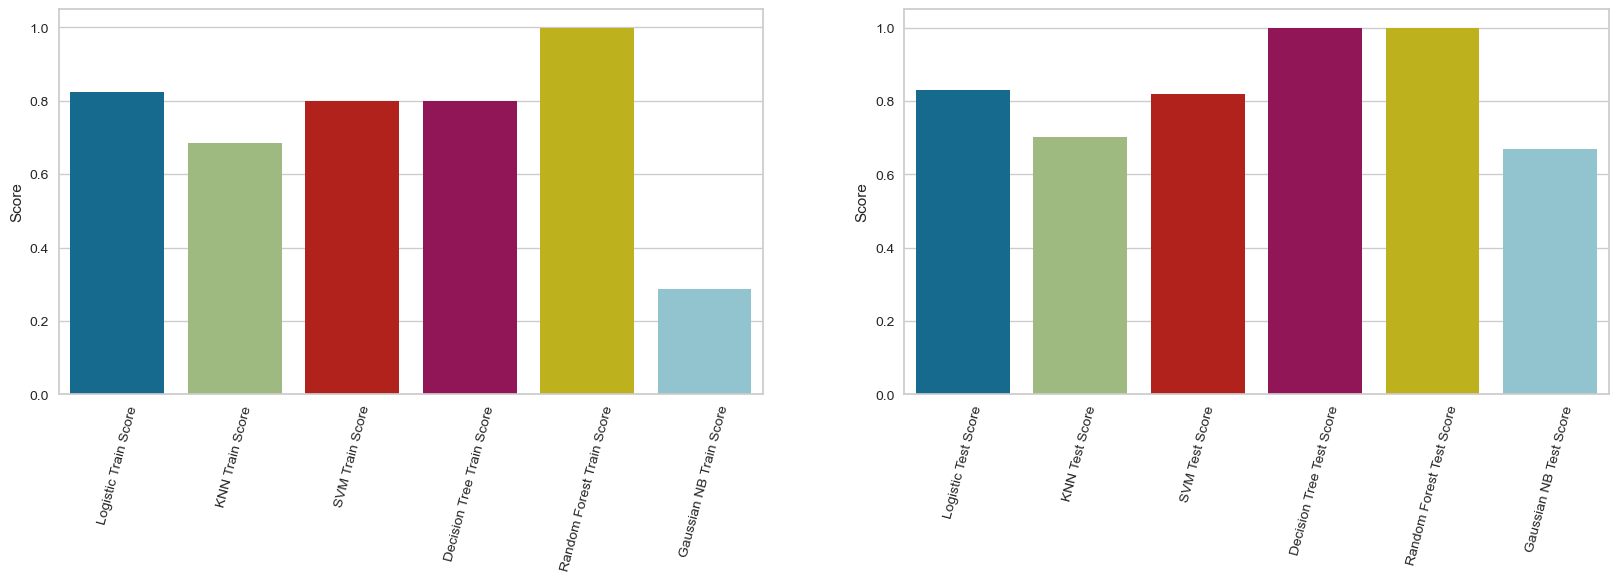

In [84]:
import seaborn as sns
 
fig,ax = plt.subplots(1,2,figsize=(20,5))
sns.barplot(x = df_result_train.index,y = df_result_train.Score,ax = ax[0])
sns.barplot(x = df_result_test.index,y = df_result_test.Score,ax = ax[1])
ax[0].set_xticklabels(df_result_train.index,rotation = 75)
ax[1].set_xticklabels(df_result_test.index,rotation = 75)
plt.show()

In [85]:
probs_reg = reg.predict_proba(X_test)[:,1]
probs_knn = knn.predict_proba(X_test)[:,1]
probs_dtc = dtc.predict_proba(X_test)[:,1]
probs_rfc = rfc.predict_proba(X_test)[:,1]
probs_gnb = gnb.predict_proba(X_test)[:,1]

probs_svc = svc.predict(X_test)
probs_svc = svc.decision_function(X_test)[:,1]
probs_svc = (probs_svc - probs_svc.min()) / (probs_svc.max() - probs_svc.min())

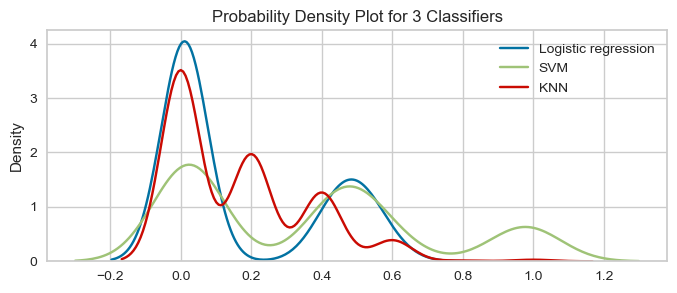

In [86]:
plt.figure(figsize=(8,3))
sns.kdeplot(probs_reg, label='Logistic regression')
sns.kdeplot(probs_svc, label='SVM')
sns.kdeplot(probs_knn, label='KNN')
leg = plt.legend(loc='upper right')
plt.title("Probability Density Plot for 3 Classifiers")
plt.show()

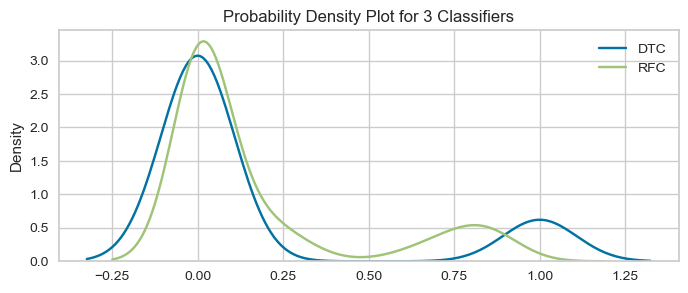

In [87]:
plt.figure(figsize=(8,3))
sns.kdeplot(probs_dtc, label='DTC')
sns.kdeplot(probs_rfc, label='RFC')
sns.kdeplot(probs_gnb, label='GNB')
leg = plt.legend(loc='upper right')
plt.title("Probability Density Plot for 3 Classifiers")
plt.show()

In [88]:
def plot_ROC_curve(model,X_train, y_train, X_test, y_test):

    # Creating visualization with the readable labels
    visualizer = ROCAUC(model, encoder={0: 0, 
                                        1: 1, 
                                        -1: -1})
                                        
    # Fitting to the training data first then scoring with the test data 
    plt.figure(figsize=(8,3))
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    visualizer.show()
    
    return visualizer

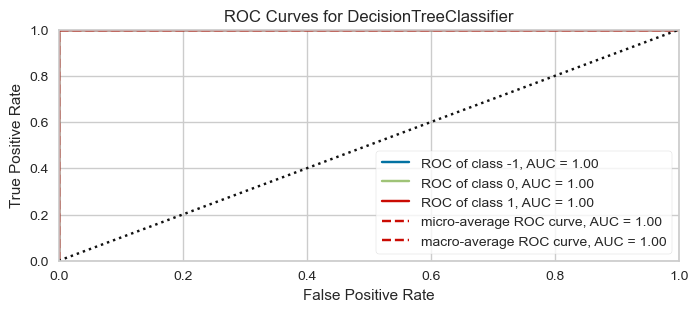

ROCAUC(ax=<AxesSubplot:title={'center':'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       encoder={-1: -1, 0: 0, 1: 1},
       estimator=DecisionTreeClassifier(random_state=42))

In [89]:
plot_ROC_curve(dtc,X_train, y_train, X_test, y_test)

### Calibratng the Decision Tree classifier

In [90]:
cal_clf = CalibratedClassifierCV(dtc, method="sigmoid", cv="prefit")
cal_clf.fit(X_train, y_train)

CalibratedClassifierCV(base_estimator=DecisionTreeClassifier(random_state=42),
                       cv='prefit')

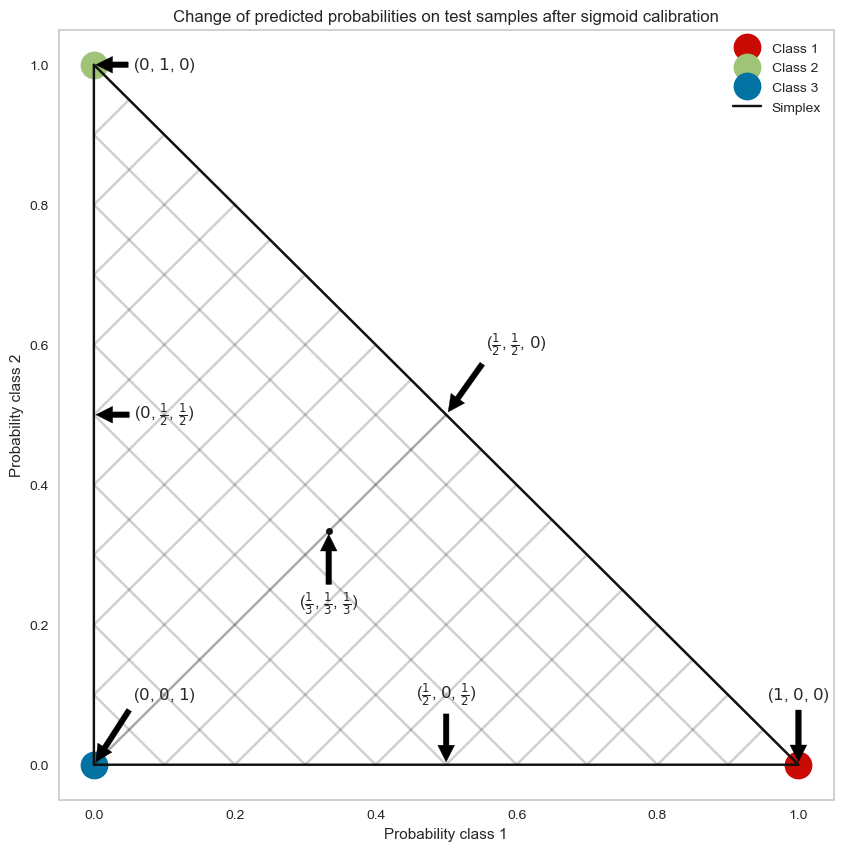

In [91]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
colors = ["r", "g", "b"]

clf_probs = dtc.predict_proba(X_test)
cal_clf_probs = cal_clf.predict_proba(X_test)
# Plot arrows
for i in range(clf_probs.shape[0]):
    plt.arrow(
        clf_probs[i, 0],
        clf_probs[i, 1],
        cal_clf_probs[i, 0] - clf_probs[i, 0],
        cal_clf_probs[i, 1] - clf_probs[i, 1],
        color=colors[y_test[i][0]],
        head_width=1e-2,
    )

# Plot perfect predictions, at each vertex
plt.plot([1.0], [0.0], "ro", ms=20, label="Class 1")
plt.plot([0.0], [1.0], "go", ms=20, label="Class 2")
plt.plot([0.0], [0.0], "bo", ms=20, label="Class 3")

# Plot boundaries of unit simplex
plt.plot([0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 1.0, 0.0], "k", label="Simplex")

# Annotate points 6 points around the simplex, and mid point inside simplex
plt.annotate(
    r"($\frac{1}{3}$, $\frac{1}{3}$, $\frac{1}{3}$)",
    xy=(1.0 / 3, 1.0 / 3),
    xytext=(1.0 / 3, 0.23),
    xycoords="data",
    arrowprops=dict(facecolor="black", shrink=0.05),
    horizontalalignment="center",
    verticalalignment="center",
)
plt.plot([1.0 / 3], [1.0 / 3], "ko", ms=5)
plt.annotate(
    r"($\frac{1}{2}$, $0$, $\frac{1}{2}$)",
    xy=(0.5, 0.0),
    xytext=(0.5, 0.1),
    xycoords="data",
    arrowprops=dict(facecolor="black", shrink=0.05),
    horizontalalignment="center",
    verticalalignment="center",
)
plt.annotate(
    r"($0$, $\frac{1}{2}$, $\frac{1}{2}$)",
    xy=(0.0, 0.5),
    xytext=(0.1, 0.5),
    xycoords="data",
    arrowprops=dict(facecolor="black", shrink=0.05),
    horizontalalignment="center",
    verticalalignment="center",
)
plt.annotate(
    r"($\frac{1}{2}$, $\frac{1}{2}$, $0$)",
    xy=(0.5, 0.5),
    xytext=(0.6, 0.6),
    xycoords="data",
    arrowprops=dict(facecolor="black", shrink=0.05),
    horizontalalignment="center",
    verticalalignment="center",
)
plt.annotate(
    r"($0$, $0$, $1$)",
    xy=(0, 0),
    xytext=(0.1, 0.1),
    xycoords="data",
    arrowprops=dict(facecolor="black", shrink=0.05),
    horizontalalignment="center",
    verticalalignment="center",
)
plt.annotate(
    r"($1$, $0$, $0$)",
    xy=(1, 0),
    xytext=(1, 0.1),
    xycoords="data",
    arrowprops=dict(facecolor="black", shrink=0.05),
    horizontalalignment="center",
    verticalalignment="center",
)
plt.annotate(
    r"($0$, $1$, $0$)",
    xy=(0, 1),
    xytext=(0.1, 1),
    xycoords="data",
    arrowprops=dict(facecolor="black", shrink=0.05),
    horizontalalignment="center",
    verticalalignment="center",
)
# Add grid
plt.grid(False)
for x in [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]:
    plt.plot([0, x], [x, 0], "k", alpha=0.2)
    plt.plot([0, 0 + (1 - x) / 2], [x, x + (1 - x) / 2], "k", alpha=0.2)
    plt.plot([x, x + (1 - x) / 2], [0, 0 + (1 - x) / 2], "k", alpha=0.2)

plt.title("Change of predicted probabilities on test samples after sigmoid calibration")
plt.xlabel("Probability class 1")
plt.ylabel("Probability class 2")
plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)
_ = plt.legend(loc="best")
